# Melatonin Product Review Analysis

This project performs a natural language processing (NLP) analysis on Amazon product reviews for melatonin supplements. The analysis includes text preprocessing, feature extraction, sentiment analysis, and machine learning model training for dose prediction based on review text.


### 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings

from imblearn.over_sampling import SMOTE, ADASYN

| Library              | Purpose                                                                                |
|----------------------|----------------------------------------------------------------------------------------|
| `pandas`             | Think of multidimensional array but with extra features to work on the data            |
| `matplotlib`         | To visualize the data in a graphical way                                               |
| `seaborn`            | To visualize the statistical data provided by `matplotlib` in a more informative way   |
| `TfidfVectorizer`    | To convert the raw text data into a matrix of TF-IDF features                          |
| `stopwords`          | To remove the less useful words from a line of text (for example: 'the', 'is', 'in')   |
| `word_tokenize`      | To break down a line of text into tokens such as words, phrases, symbols, etc.         |
| `train_test_split`   | To divide the dataset into training data and testing data                              |
| `MultinomialNB`      | A Naive Bayes classifier based on the multinomial distribution                         |
| `LogisticRegression` | Machine Learning model used for binary classification tasks                            |
| `accuracy_score`     | To calculate the accuracy classification score of our Machine Learning models          |

### 2. Configure the libraries
- **numpy**: By default, numpy will print only 1000 elements in the array. We'll instruct numpy to print infinite elements (if present) in the array
- **pandas**: By default, pandas will show only 20 columns. Let's change the setting to show all available columns in the dataset
- **seaborn**: seaborn.countplot() will throw a warning to indicate a default parameter will have a different value. For now, we can suppress this using `filterwarnings()`

In [2]:
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 2. Read the dataset
- The dataset is present in multiple csv files. We read all the files and add them to a dataframe to make operating on the data easier

In [3]:
file_paths = [
    "Adult\B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin.csv",
    "Adult\B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv", 
    "Adult\B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv",
    "Adult\B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv",
    "Adult\B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv",
    "Adult\B079TD7HG2_NatrolMelatoninSleepAidGummy.csv",
    "Adult\B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv"
]

csv_dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(csv_dataframes, ignore_index=True)

### 3. Peek into the dataset
- Let's have a look at the columns (features) and samples (rows) in the dataset to know more about what we are working on. 
- For now, we will look the first 5 samples

In [4]:
df.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,review_rating,review_date,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,4,2-May-21,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,4,11-May-22,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,5,10-May-21,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,5,20-Apr-17,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,5,18-Aug-20,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


### 4. Remove unncessary features
- For the scope of this analysis, we are interested only on the `product_title`, `average_rating`, `total_reviews`, `review_rating`, `review_header`, `review_text`. 
- All the remaining features are therefore deemed unnecessary.

In [5]:
columns_to_drop = [
    "asin", "review_author", "author_badge", "badge", 
    "reviewed_product_attribute", "reviewed_variant_asin", 
    "variant_review_url", "review_date", "reviewed_country",
    "review_comment_count", "no_of_people_reacted_helpful",
    "author_profile_url", "url", "review_url", "brand", "input"
]

df = df.drop(columns=columns_to_drop)

- Let's look at the dataframe after discarding the unncessary features

In [6]:
df.head()

,product_title,average_rating,total_reviews,review_rating,review_text,review_header
0,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,4,"These works great, I think the gel capsule dis...",Max dose and it hits faster than other quick r...
1,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,4,Powerful! Will knock you right out!,Powerful!
2,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,5,"Best melatonin I've tried,so much better then ...",Amazing
3,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,5,"Works like a charm, great price.",Five Stars
4,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,5,"I love this product, I use it to sleep at nigh...","This is one great product, people should try it."


### 5. Looking for `NULL` values
- `NULL` values can cause confusion during our analysis and interfere with model's ability to produce accurate predictions.
- It is important to handle these `NULL` values either by discarding the rows that have `NULL` values or replacing them with an appropriate value. 
> Note: If the replacement value is not suitable then it will produce noise in the dataset which will hamper the model's prediction ability

In [7]:
null_values_count = df.isnull().sum()
print(null_values_count)

product_title      0
average_rating     0
total_reviews      0
review_rating      0
review_text       28
review_header      5
dtype: int64


- Some of the samples have `NULL` values in the `review_text` and `review_header` features.
- For now, let's consider the sample that do not contain `NULL` in `review_text` and `review_header`

In [8]:
df = df[df['review_text'].notna()]
df = df[df['review_header'].notna()]

- Ensure that we no longer have `NULL` values in the dataframe

In [9]:
null_values_count = df.isnull().sum()
print(null_values_count)

product_title     0
average_rating    0
total_reviews     0
review_rating     0
review_text       0
review_header     0
dtype: int64


### 6. Feature Engineering
- Let's add a `dose` feature by extracting the dose from `product_title`

In [10]:
df['dose'] = df['product_title'].str.extract('(\d+)\s*mg', expand=False).astype(float)

In [11]:
df

,product_title,average_rating,total_reviews,review_rating,review_text,review_header,dose
0,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,4,"These works great, I think the gel capsule dis...",Max dose and it hits faster than other quick r...,NaN
1,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,4,Powerful! Will knock you right out!,Powerful!,NaN
2,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,5,"Best melatonin I've tried,so much better then ...",Amazing,NaN
3,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,5,"Works like a charm, great price.",Five Stars,NaN
4,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,5,"I love this product, I use it to sleep at nigh...","This is one great product, people should try it.",NaN
...,...,...,...,...,...,...,...
15905,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,3,They taste and work great!!!! Fall asleep pret...,They work Great!!!!,12.0
15906,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,3,They weren’t the best tasting. But they worked...,Tastes gross,12.0
15907,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,2,I usually buy the Puritans Pride 10mg capsules...,Don't work for me,12.0
15908,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,5,Works like a charm. Great sleep!!!,Works like a charm,12.0


- A lot of products don't have a dosage value in the `product_title`. It's very likely the `dose` contains `NULL` values

In [12]:
df.dose.isnull().sum()

3197

- Fill `NULL` values in `dose` with `0`

In [13]:
df['dose'] = df['dose'].fillna(0.0)

- Ensure that our dataframe does not have any `NULL` values

In [14]:
null_values_count = df.isnull().sum()
print(null_values_count)

product_title     0
average_rating    0
total_reviews     0
review_rating     0
review_text       0
review_header     0
dose              0
dtype: int64


### 7. Visualizing our data
- Let's visualize our data using a bar chart

- Get the frequency of each unique value in the 'dose' column

In [15]:
dose_counts = df['dose'].value_counts()

- Plot the frequencies as a bar chart

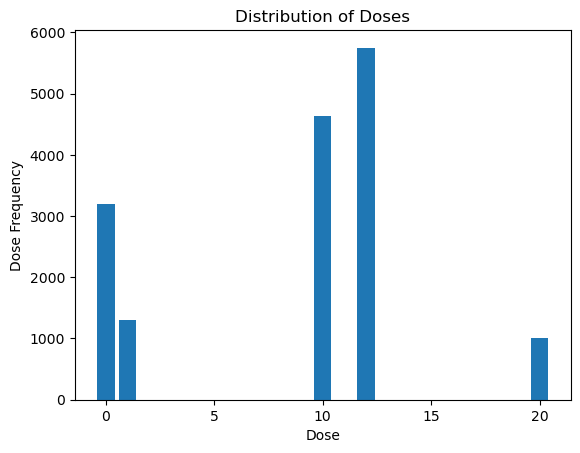

In [16]:
plt.bar(dose_counts.index, dose_counts.values)
plt.title("Distribution of Doses")
plt.xlabel("Dose")
plt.ylabel("Dose Frequency")
plt.show()

### 8. Some Natural Language Processing
- Let's analyze our `review_rating` feature
- `review_rating` contains customer ratings for a product on a scale of 0 to 5
- Let's consider products with `review_rating` between 0 to 2 *(0 is included)* as **Negative** and products with `review_rating` between 2 to 5 *(2 is excluded)* as **Positive**

In [17]:
df['sentiment'] = pd.cut(
    df['review_rating'], 
    bins=[0, 2, 5], 
    labels=['Negative', 'Positive'], 
    include_lowest=True
)

- Let's have a look at how many products have a Positive or a Negative sentiment

In [18]:
print(df['sentiment'].value_counts())

sentiment
Positive    13419
Negative     2461
Name: count, dtype: int64


- Let's visualize this data graphically to understand better

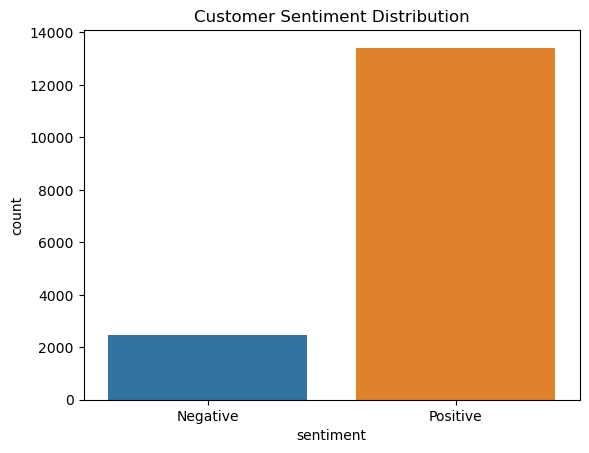

In [19]:
sns.countplot(x='sentiment', data=df)
plt.title('Customer Sentiment Distribution')
plt.show()

- Before we proceed with the TF-IDF vectorization, let's remove the stopwords from `review_text` so that we can produce the ngrams
- We'll get the list of stopwords from the `stopwords` library

In [20]:
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['review_text'].apply(
    lambda x: ' '.join([
        word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words
    ])
)

- Let's look at the new data (say `cleaned_text`) after removing the stopwords from `review_text`

In [21]:
df['cleaned_text']

0        works great think gel capsule dissolves much f...
1                                     powerful knock right
2                         best melatonin tried much better
3                             works like charm great price
4        love product use sleep night every time take m...
                               ...                        
15905            taste work great fall asleep pretty quick
15906                             best tasting worked kind
15907    usually buy puritans pride capsules take much ...
15908                         works like charm great sleep
15909    flavor great could chew choose relaxes help sleep
Name: cleaned_text, Length: 15880, dtype: object

- Let's store each line in the `cleaned_text` as a list so that we can apply TF-IDF vectorization on each line

In [22]:
list_of_cleaned_text_strings = df['cleaned_text'].tolist()

- Now let's apply TF-IDF on each line and get the most important words from that line
- Also, we'll configure the vectorizer to produce unigrams *(ngrams of size 1)* and bigrams *(ngrams of size 2)*

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(list_of_cleaned_text_strings)

- Let's look at all the unigrams and bigrams produced by the vectorizer

In [24]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)

['ability' 'ability fall' 'able' 'able fall' 'able find' 'able get'
 'able go' 'able sleep' 'able wake' 'absolute' 'absolutely'
 'absolutely disgusting' 'absolutely effect' 'absolutely love'
 'absolutely nothing' 'absolutely terrible' 'absorb' 'according' 'across'
 'acting' 'action' 'active' 'activities' 'acts' 'actual' 'actually'
 'actually fall' 'actually feel' 'actually help' 'actually make'
 'actually sleep' 'actually work' 'actually works' 'add' 'added'
 'addictive' 'adding' 'addition' 'additional' 'additives' 'adhd' 'adjust'
 'admit' 'adult' 'adults' 'adverse' 'advertised' 'advertising' 'advice'
 'advise' 'advised' 'affect' 'affective' 'affects' 'affordable' 'afraid'
 'afternoon' 'aftertaste' 'afterwards' 'age' 'ages' 'ago' 'agradable'
 'agrado' 'agree' 'ahead' 'aid' 'aid ever' 'aid sleep' 'aid work'
 'aid works' 'aide' 'aides' 'aids' 'al' 'alarm' 'alarm goes' 'alert'
 'allergic' 'allergy' 'allow' 'allowed' 'allowing' 'allows' 'almost'
 'almost every' 'almost immediately' 'almost

- Now let's look at the initial 1000 TF-IDF matrix values for each of the produced ngram

In [25]:
top_words = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
top_words.head(1000)

ability  ability fall  able  able fall  able find  able get  able go  \
0        0.0           0.0   0.0        0.0        0.0       0.0      0.0   
1        0.0           0.0   0.0        0.0        0.0       0.0      0.0   
2        0.0           0.0   0.0        0.0        0.0       0.0      0.0   
3        0.0           0.0   0.0        0.0        0.0       0.0      0.0   
4        0.0           0.0   0.0        0.0        0.0       0.0      0.0   
..       ...           ...   ...        ...        ...       ...      ...   
995      0.0           0.0   0.0        0.0        0.0       0.0      0.0   
996      0.0           0.0   0.0        0.0        0.0       0.0      0.0   
997      0.0           0.0   0.0        0.0        0.0       0.0      0.0   
998      0.0           0.0   0.0        0.0        0.0       0.0      0.0   
999      0.0           0.0   0.0        0.0        0.0       0.0      0.0   

     able sleep  able wake  absolute  absolutely  absolutely disgusting  \
0           0.0        0.0       0.0         0.0                    0.0   
1           0.0        0.0       0.0         0.0                    0.0   
2           0.0        0.0       0.0         0.0                    0.0   
3           0.0        0.0       0.0         0.0                    0.0   
4           0.0        0.0       0.0         0.0                    0.0   
..          ...        ...       ...         ...                    ...   
995         0.0        0.0       0.0         0.0                    0.0   
996         0.0        0.0       0.0         0.0                    0.0   
997         0.0        0.0       0.0         0.0                    0.0   
998         0.0        0.0       0.0         0.0                    0.0   
999         0.0        0.0       0.0         0.0                    0.0   

     absolutely effect  absolutely love  absolutely nothing  \
0                  0.0              0.0                 0.0   
1                  0.0              0.0                 0.0   
2                  0.0              0.0                 0.0   
3                  0.0              0.0                 0.0   
4                  0.0              0.0                 0.0   
..                 ...              ...                 ...   
995                0.0              0.0                 0.0   
996                0.0              0.0                 0.0   
997                0.0              0.0                 0.0   
998                0.0              0.0                 0.0   
999                0.0              0.0                 0.0   

     absolutely terrible  absorb  according  across  acting  action  active  \
0                    0.0     0.0        0.0     0.0     0.0     0.0     0.0   
1                    0.0     0.0        0.0     0.0     0.0     0.0     0.0   
2                    0.0     0.0        0.0     0.0     0.0     0.0     0.0   
3                    0.0     0.0        0.0     0.0     0.0     0.0     0.0   
4                    0.0     0.0        0.0     0.0     0.0     0.0     0.0   
..                   ...     ...        ...     ...     ...     ...     ...   
995                  0.0     0.0        0.0     0.0     0.0     0.0     0.0   
996                  0.0     0.0        0.0     0.0     0.0     0.0     0.0   
997                  0.0     0.0        0.0     0.0     0.0     0.0     0.0   
998                  0.0     0.0        0.0     0.0     0.0     0.0     0.0   
999                  0.0     0.0        0.0     0.0     0.0     0.0     0.0   

     activities  acts  actual  actually  actually fall  actually feel  \
0           0.0   0.0     0.0       0.0            0.0            0.0   
1           0.0   0.0     0.0       0.0            0.0            0.0   
2           0.0   0.0     0.0       0.0            0.0            0.0   
3           0.0   0.0     0.0       0.0            0.0            0.0   
4           0.0   0.0     0.0       0.0            0.0            0.0   
..          ...   ...     ...      

In [26]:
# Since there are 5,000,000 values in the top_words dataframe, the list of non-null values could be too long
# However, if you wish to have a look at all the non-zero values, feel free the run the code in this cell

# stacked_non_zero_values = top_words[top_words > 0.0].stack()
# print(stacked_non_zero_values.to_string())

- Let's visualize the data in our TF-IDF matrix and have a look at the first 50 top words

In [27]:
top_words_sum = top_words.sum(axis=0)
top_words_freq = [(word, top_words_sum[word]) for word in feature_names]
top_words_freq = sorted(top_words_freq, key=lambda x: x[1], reverse=True)[:50]

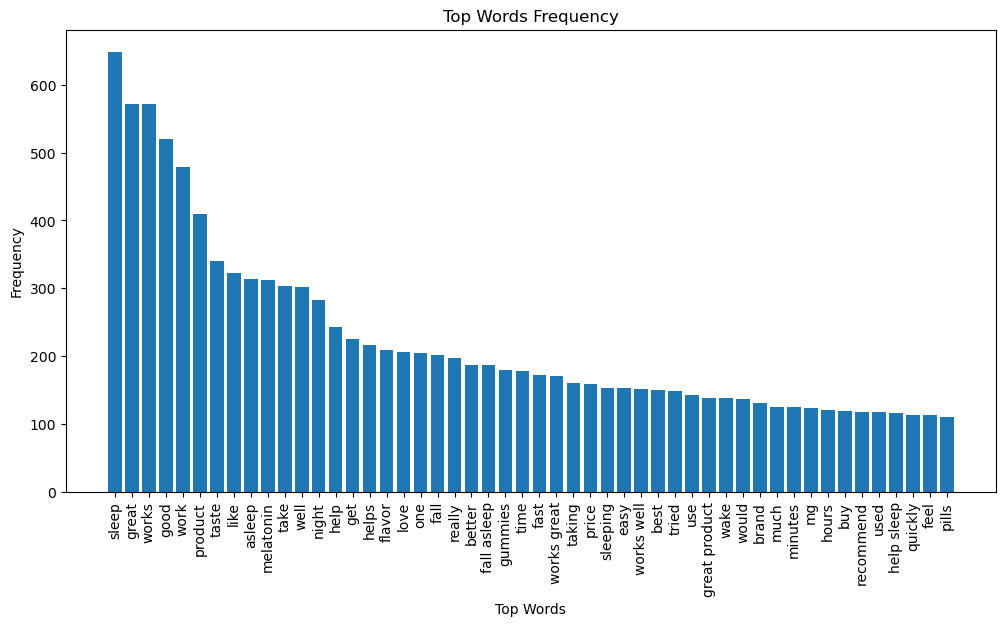

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(
    range(len(top_words_freq)), 
    [freq for i, freq in top_words_freq], 
    align="center"
)
plt.xticks(
    range(len(top_words_freq)), 
    [word for word, i in top_words_freq], 
    rotation = 90
)
plt.xlabel("Top Words")
plt.ylabel("Frequency")
plt.title("Top Words Frequency")
plt.show()

### 9. Model training
- We'll train a Multinomial Naive Bayes model and a Logistic Regression model on `cleaned_text` and `dose`

- Let's split the data into training and test sets
- We'll use 70% of our data for training the model and 30% of our data for testing the model
- We'll also use `random_state = 42` to ensure that every time we run our code, training and testing data is the same as the training and testing data from the previous run (To get same outcome no matter how many times we run this notebook)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], 
    df['dose'], 
    test_size=0.3, 
    random_state = 42
)

- Initialize TF-IDF vectorizer and vectorize the text data for our models

In [30]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#### 9.1 Multinomial Naive Bayes classifier

- Let's train our Multinomial NB classifier

In [31]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

- Let's test our Multinomial NB classifier

In [32]:
y_pred = classifier.predict(X_test_vectorized)

- Let's find out the accuracy for our Multinomial NB classifier

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Multinomial Naive Bayes classifier : {accuracy:.2f}")

Accuracy for Multinomial Naive Bayes classifier : 0.49


- Let's have a look at the classification report for our Multinomial NB classifier

In [34]:
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.53      0.21      0.30       945
         1.0       0.50      0.01      0.02       389
        10.0       0.58      0.53      0.55      1364
        12.0       0.46      0.81      0.58      1762
        20.0       1.00      0.00      0.00       304

    accuracy                           0.49      4764
   macro avg       0.61      0.31      0.29      4764
weighted avg       0.54      0.49      0.44      4764



#### 9.2 Logistic Regression

- Let's train our Logistic regression model

In [35]:
classifier = LogisticRegression(solver='lbfgs', max_iter=5000)
classifier.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=5000)

- Let's test our Logistic Regression model

In [36]:
y_pred = classifier.predict(X_test_vectorized)

- Let's find out the accuracy for our Logistic Regression model

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression classifier : {accuracy:.2f}")

Accuracy for Logistic Regression classifier : 0.51


- Let's have a look at the classification report for our Logistic Regression model

In [38]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.44      0.36      0.39       945
         1.0       0.45      0.05      0.10       389
        10.0       0.58      0.59      0.58      1364
        12.0       0.49      0.71      0.58      1762
        20.0       0.17      0.00      0.01       304

    accuracy                           0.51      4764
   macro avg       0.42      0.34      0.33      4764
weighted avg       0.48      0.51      0.47      4764



### 10. Top reactions for every dose

- For our last step, let's hace a look at what reactions customers had after consuming a product of a specific dosage

In [39]:
reaction_keywords = [
    'nausea',
    'digestion',
    'upset stomach',
    'appetite',
    'relax',
    'calm',
    'better sleep',
    'tasty',
    'disgusting',
    'sweet'
]

- Adding a new feature `reaction_after_eating` to the dataframe
- If a line in `cleaned_text` that has any of the words mentioned in `reaction_keywords` then that line is marked as `True`

In [40]:
df['reaction_after_eating'] = df['cleaned_text'].apply(lambda x: any(keyword in str(x).lower() for keyword in reaction_keywords))

- Let's calculate the top reactions for each dose

In [41]:
for dose, group_df in df.groupby('dose'):
    # Filter the group DataFrame to include only rows with 'reaction_after_eating' == True
    reaction_rows = group_df[group_df['reaction_after_eating'] == True]
    
    # Check if there are any rows with reactions for the current dose
    if not reaction_rows.empty:
        print(f"Top reactions for {dose}mg:")
        
        # Create a TF-IDF matrix for the reaction rows
        tfidf_vectorizer = TfidfVectorizer(max_features=10)
        tfidf_matrix = tfidf_vectorizer.fit_transform(reaction_rows['cleaned_text'])
        
        # Get the reaction words (i.e. the feature names)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Create a DataFrame with the TF-IDF matrix and reaction words
        top_words = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
        
        # Calculate the sum of TF-IDF values for each reaction word
        top_words_sum = top_words.sum(axis=0)
        
        # Sort the words based on their sum of TF-IDF values (descending order)
        sorted_top_words = top_words_sum.sort_values(ascending=False)
        
        # Print the top 10 words
        print(sorted_top_words)
        print("\n")
    else:
        print(f"No reactions found for {dose}mg.\n")

Top reactions for 0.0mg:
sleep        23.318862
better       14.348034
melatonin    12.890322
relax        11.084865
like          9.606424
take          9.398618
help          8.512980
night         8.382492
asleep        7.757873
taking        6.630762
dtype: float64


Top reactions for 1.0mg:
sleep        33.223668
sweet        25.085216
work         16.116448
taste        16.069946
asleep       15.532238
take         15.317694
gummies      14.026122
like         12.388319
melatonin    11.466467
night        10.226968
dtype: float64


Top reactions for 10.0mg:
sleep        80.661718
tasty        50.322435
asleep       49.727652
take         46.599996
melatonin    44.839444
gummies      41.020966
like         40.207144
taste        39.042886
night        38.990839
work         35.836356
dtype: float64


Top reactions for 12.0mg:
sleep        67.871427
taste        34.879100
like         33.095907
melatonin    30.550117
take         27.099345
product      26.374560
asleep       24.532

### Conclusion:

This Jupyter notebook focuses on the analysis to provide insights into the customer sentiment towards melatonin products, as well as the relationship between review text and dosage information. \
The two machine learning models, trained in this notebook, can be used to predict dosage based on review text, although the **current model performance requires further improvement.**

- Todo
1. Performance of both Multinomial NB and Logistic Regression is below expected values (Accuracy: approx 50%). \
   Possible reasons could be 
   - Class imbalance in the `['positive', 'negative']` sentiments 
   - Improper hyperparameter tuning which could result in underfitting/overfitting
   Attempt possible solutions (for respective problems)
   - Implement sampling techniques to handle class imbalance
   - Implement Regularization to tune the C parameter

2. Implement other models such as SVM and XGBoost and observe their performance on this dataset

#### Experimentation

In [51]:
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

from sklearn.preprocessing import LabelEncoder

# Label encoding for 'dose'
le = LabelEncoder()
df['dose'] = le.fit_transform(df['dose'].astype(str))

# SVM Model
svm_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', LinearSVC())
])

# XGBoost Model
xgb_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', xgb.XGBClassifier())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['dose'], test_size=0.3, random_state=42)

# Train SVM Model
svm_pipeline.fit(X_train, y_train)
svm_y_pred = svm_pipeline.predict(X_test)

# Evaluate SVM Model
print("SVM Model Performance:")
print(classification_report(y_test, svm_y_pred))

# Train XGBoost Model
xgb_pipeline.fit(X_train, y_train)
xgb_y_pred = xgb_pipeline.predict(X_test)

# Evaluate XGBoost Model
print("\nXGBoost Model Performance:")
print(classification_report(y_test, xgb_y_pred))

SVM Model Performance:
              precision    recall  f1-score   support

           0       0.41      0.38      0.39       945
           1       0.23      0.11      0.15       389
           2       0.55      0.60      0.57      1364
           3       0.49      0.59      0.53      1762
           4       0.08      0.03      0.04       304

    accuracy                           0.47      4764
   macro avg       0.35      0.34      0.34      4764
weighted avg       0.44      0.47      0.45      4764


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.46      0.33      0.38       945
           1       0.45      0.06      0.10       389
           2       0.63      0.54      0.58      1364
           3       0.47      0.76      0.58      1762
           4       0.20      0.02      0.04       304

    accuracy                           0.51      4764
   macro avg       0.44      0.34      0.34      4764
weighted avg       0.50   

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# SVM Pipeline
svm_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', LinearSVC())
])

# Parameter grid for SVM
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__dual': [True, False],  # Dual or primal formulation
    'classifier__max_iter': [1000, 2000, 3000]  # Maximum number of iterations
}

# Grid Search for SVM
grid_search_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best SVM model
best_svm_model = grid_search_svm.best_estimator_
svm_y_pred = best_svm_model.predict(X_test)

# Evaluate the best SVM model
print("Best SVM Model Performance:")
print(classification_report(y_test, svm_y_pred))

Best SVM Model Performance:
              precision    recall  f1-score   support

           0       0.45      0.34      0.39       945
           1       0.56      0.04      0.07       389
           2       0.57      0.60      0.59      1364
           3       0.49      0.72      0.58      1762
           4       0.00      0.00      0.00       304

    accuracy                           0.51      4764
   macro avg       0.41      0.34      0.33      4764
weighted avg       0.48      0.51      0.47      4764



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', XGBClassifier())
])

# Parameter grid for XGBoost
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],  # Maximum tree depth
    'classifier__n_estimators': [100, 200, 300, 500],  # Number of trees
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2]  # Learning rate
}

# Randomized Search for XGBoost
random_search_xgb = RandomizedSearchCV(xgb_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Best XGBoost model
best_xgb_model = random_search_xgb.best_estimator_
xgb_y_pred = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model
print("Best XGBoost Model Performance:")
print(classification_report(y_test, xgb_y_pred))